Part 1

In [1]:
import intcode as intcode

In [12]:
f = open('input_d11.txt',"r")
line = f.readline()
l = [int(i.strip()) for i in line.split(',')]
l = {k: v for k,v in enumerate(l)}

In [3]:
def direction(current_point, current_direction, turn_to):
    new_direction = current_direction
    current_x = current_point[0]
    current_y = current_point[1]
    if current_direction == '^' and turn_to == 0:
        new_direction = '<'
        new_point = (current_x-1, current_y)
    elif current_direction == '^' and turn_to == 1:
        new_direction = '>'
        new_point = (current_x+1, current_y)
    elif current_direction == '<' and turn_to == 0:
        new_direction = 'v'
        new_point = (current_x, current_y-1)
    elif current_direction == '<' and turn_to == 1:
        new_direction = '^'
        new_point = (current_x, current_y+1)
    elif current_direction == 'v' and turn_to == 0:
        new_direction = '>'
        new_point = (current_x+1, current_y)
    elif current_direction == 'v' and turn_to == 1:
        new_direction = '<'
        new_point = (current_x-1, current_y)
    elif current_direction == '>' and turn_to == 0:
        new_direction = '^'
        new_point = (current_x, current_y+1)
    else :
        new_direction = 'v'
        new_point = (current_x, current_y-1)
    
    return new_direction, new_point
    

In [4]:
points = []
colors = []
color = 0
current_direction = '^'
current_point = (0,0)
i=0
relative_base = 0
while current_point!=None:
    try:
        idx = points.index(current_point)
        color = colors[idx]
        output = intcode.TEST2(l, color,i, relative_base)
        colors[idx] = output[0][0]
        i = output[2]
        l = output[1]
        relative_base = output[3]
    except:
        output = intcode.TEST2(l, 0,i, relative_base)
        colors.append(output[0][0])
        points.append(current_point)
        i = output[2]
        l = output[1]
        relative_base = output[3]
    d = direction(current_point, current_direction, output[0][1])
    current_point = d[1]
    current_direction = d[0]

TypeError: 'NoneType' object is not subscriptable

In [5]:
len(points)

2469

Part 2

In [13]:
points = []
col = []
color = 1
current_direction = '^'
current_point = (0,0)
relative_base = 0
i=0
while current_point!=None:
    try:
        idx = points.index(current_point)
        color = col[idx]
        output = intcode.TEST2(l, color,i, relative_base)
        col[idx] = output[0][0]
        i = output[2]
        l = output[1]
        relative_base = output[3]
    except:
        if points == []:
            output = intcode.TEST2(l, 1,i, relative_base)
        else:
            output = intcode.TEST2(l, 0,i, relative_base)
        relative_base = output[3]
        col.append(output[0][0])
        points.append(current_point)
        i = output[2]
        l = output[1]
    d = direction(current_point, current_direction, output[0][1])
    current_point = d[1]
    current_direction = d[0]

KeyError: -1

In [14]:
len(points)

249

In [65]:
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np

In [33]:
x_min = min(points,key=itemgetter(0))[0] 
x_max = max(points,key=itemgetter(0))[0] 
y_min = min(points,key=itemgetter(1))[1] 
y_max = max(points,key=itemgetter(1))[1] 

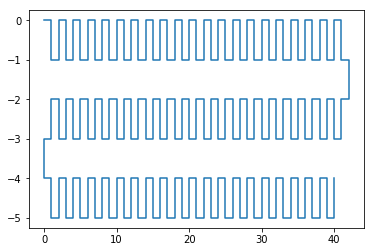

In [38]:
plt.plot(*zip(*points))
plt.show()

In [68]:
picture = []
for i in range(6):
    picture.append([0]*43)

In [69]:
for idx,i in enumerate(points):
    x = i[0]
    y = abs(i[1])
    if col[idx]==0:
        picture[y][x]=1

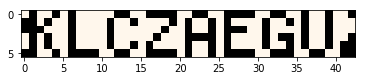

In [71]:
a = np.ma.masked_where(np.array(picture) == 0, np.array(picture))

cmap = plt.cm.OrRd
cmap.set_bad(color='black')

plt.imshow(a, interpolation='none', cmap=cmap)